## Метод k-ближайших соседей

Метод k-ближайших соседей — метрический алгоритм для автоматической классификации объектов или регрессии. Объект ассоциируется с наиболее распространенным в окрестности классом для классификации либо со средним среди k ближайших соседей значением для регрессии Алгоритм может быть применим к выборкам с большим количеством атрибутов (многомерным). Для этого перед применением нужно определить функцию расстояния; классический вариант такой функции — евклидова метрика.

# Scikit-Learn California Housing Dataset


    MedInc - median income in block group
    HouseAge - median house age in a block group
    AveRooms - the average number of rooms (provided per household)
    AveBedrms - the average number of bedrooms (provided per household)
    Population - block group population
    AveOccup - the average number of household members
    Latitude - block group latitude
    Longitude - block group longitude
    MedHouseVal - median house value for California districts (hundreds of thousands of dollars)


In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

df = fetch_california_housing(as_frame=True).frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
print(df.shape)

(20640, 9)


Делим по категориям

In [4]:
df["MedHouseValCat"] = pd.qcut(df["MedHouseVal"], 4, retbins=False, labels=[1, 2, 3, 4])

y = df['MedHouseValCat']
X = df.drop(['MedHouseVal', 'MedHouseValCat'], axis = 1)
X.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000


Видно, что большой разброс по медианным значениям. Нормализируем данные

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape)

(15480, 8) (5160, 8)


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

col_names=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms',
           'Population', 'AveOccup', 'Latitude', 'Longitude']
pd.DataFrame(X_train, columns=col_names).describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,15480.0,2.074711e-16,1.000032,-1.774632,-0.688854,-0.175663,0.464450,5.842113
HouseAge,15480.0,-1.232434e-16,1.000032,-2.188261,-0.840224,0.032036,0.666407,1.855852
AveRooms,15480.0,-1.620294e-16,1.000032,-1.877586,-0.407008,-0.083940,0.257082,56.357392
AveBedrms,15480.0,7.435912e-17,1.000032,-1.740123,-0.205765,-0.108332,0.007435,55.925392
Population,15480.0,-8.996536e-17,1.000032,-1.246395,-0.558886,-0.227928,0.262056,29.971725
AveOccup,15480.0,1.055716e-17,1.000032,-0.201946,-0.056581,-0.024172,0.014501,103.737365
Latitude,15480.0,7.890329e-16,1.000032,-1.451215,-0.799820,-0.645172,0.971601,2.953905
Longitude,15480.0,2.206676e-15,1.000032,-2.380303,-1.106817,0.536231,0.785934,2.633738


## Корреляция

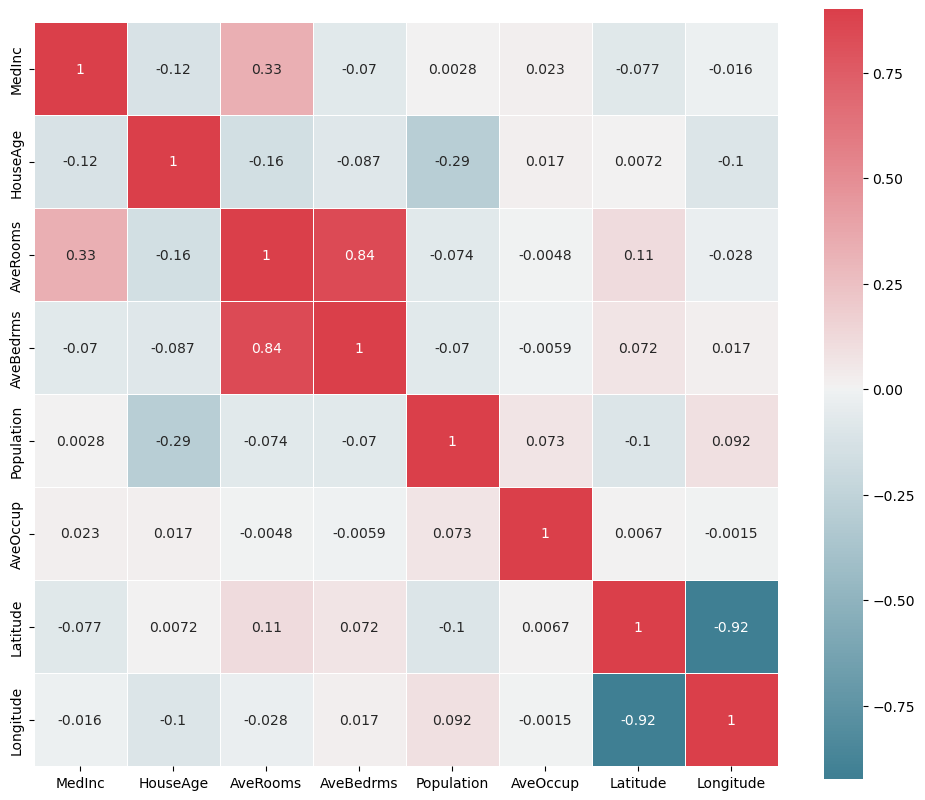

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = pd.DataFrame(X_train, columns=col_names).corr()
f, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.9, center=0, square=True, linewidths=.5, annot=True)
plt.show()

# Модель

In [12]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=10,weights="distance")
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [13]:
y_pred = classifier.predict(X_test)

# Точность

              precision    recall  f1-score   support

           1       0.79      0.77      0.78      1292
           2       0.53      0.56      0.54      1283
           3       0.51      0.55      0.53      1292
           4       0.74      0.67      0.70      1293

    accuracy                           0.64      5160
   macro avg       0.64      0.64      0.64      5160
weighted avg       0.64      0.64      0.64      5160

[[991 236  54  11]
 [199 715 307  62]
 [ 45 306 716 225]
 [ 15  96 320 862]]


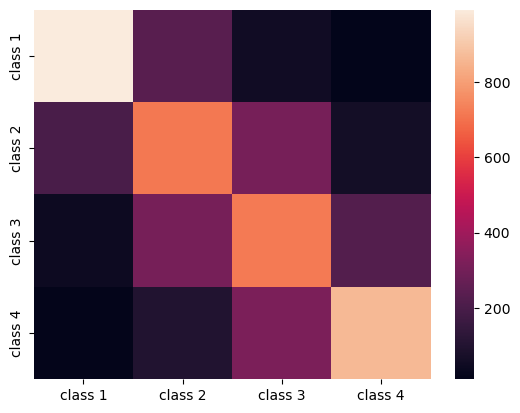

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3', 'class 4']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=classes_names, index = classes_names)

# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm);

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))


In [15]:
acc =  classifier.score(X_test, y_test)
print(acc)

0.6364341085271318


# Подбор N

In [10]:
from sklearn.metrics import f1_score

f1s = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i,weights="distance")
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

Text(0, 0.5, 'F1 Score')

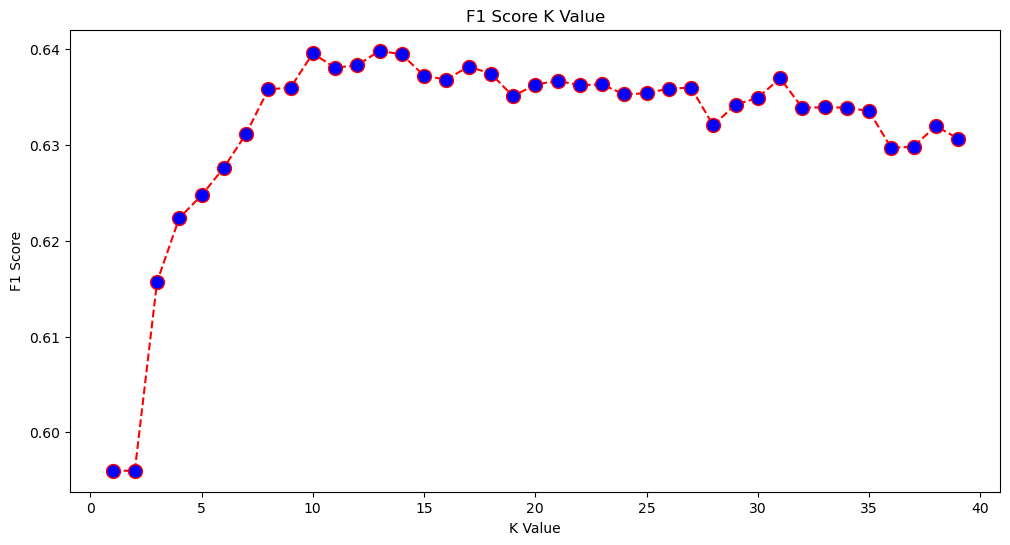

In [11]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

# Визуализация

In [16]:
xdf = pd.DataFrame(X_test, columns=col_names)
xdf["Categories"] = y_pred

xdf.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Categories
0,-1.154112,-0.285149,-0.513467,-0.170006,-0.031059,0.064471,0.193675,0.286527,1
1,-0.707567,0.111332,-0.163619,0.220178,0.120311,-0.035705,-0.237464,0.061794,1
2,-0.209176,1.855852,-0.602271,0.202822,-0.102807,-0.146070,1.009091,-1.426437,4
3,0.976656,-0.919520,0.300647,-0.174751,0.242807,0.028254,-0.640486,0.431355,3
4,-0.080534,0.428518,0.023700,-0.156895,-0.318925,-0.052111,0.456108,-1.171740,4


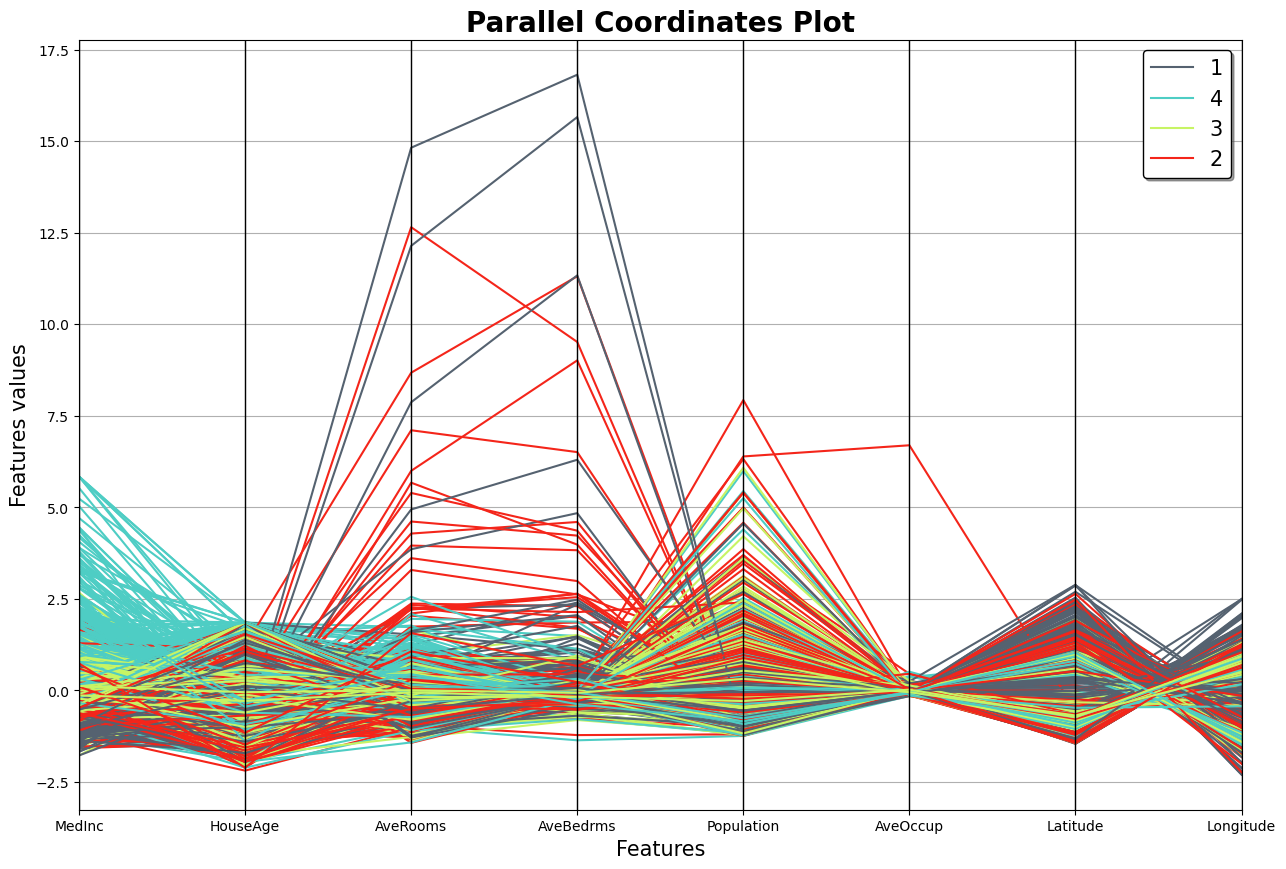

In [19]:
from pandas.plotting import parallel_coordinates

plt.style.use('default')
plt.figure(figsize=(15,10))
parallel_coordinates(xdf.dropna().head(2000), "Categories", color=('#556270', '#4ECDC4', '#C7F464', '#F4251A'))
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()


<Figure size 640x480 with 0 Axes>

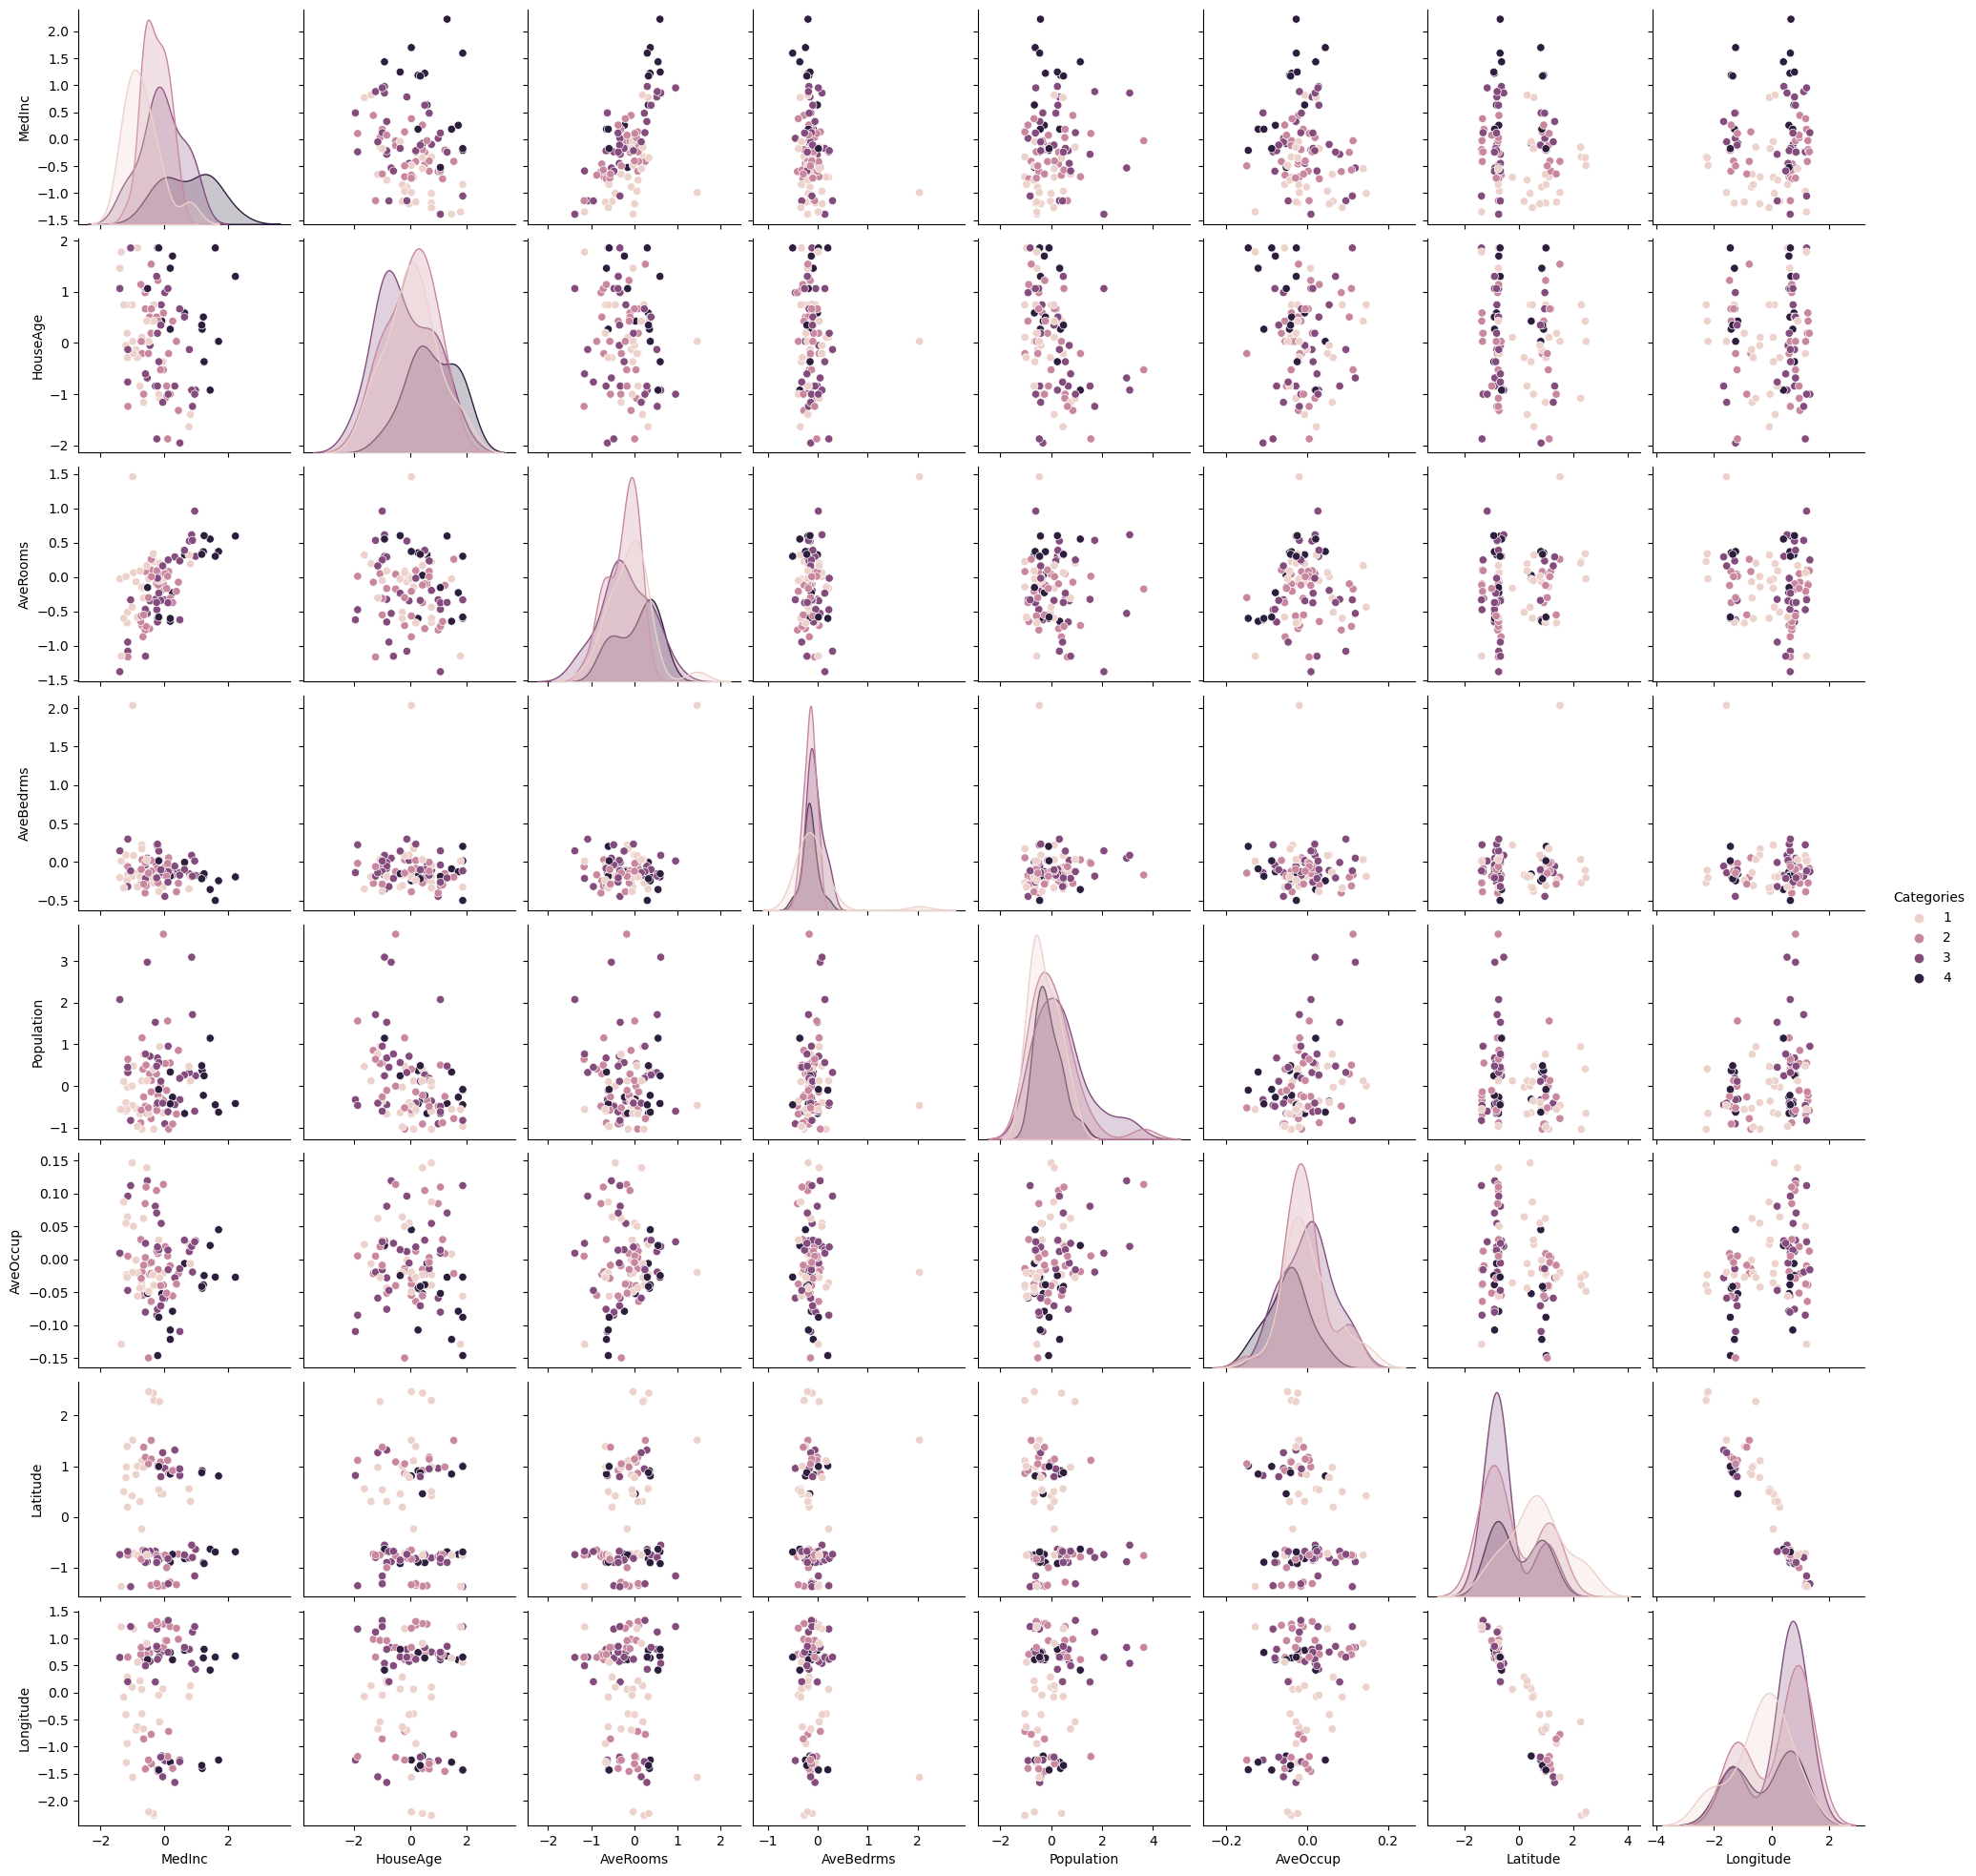

In [20]:
plt.figure()
sns.pairplot(xdf.dropna().head(100), hue = "Categories")
plt.show()